In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from tqdm.auto import tqdm
from IPython.display import display

In [2]:
# Uncomment this line to enable nbextension and restart the kernel before proceeding to next step
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


# Download Data

Download data from Kaggle [here](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) and unzip it to retrieve `fer2013.csv`  file and place the file to a folder named as `dataset`. The file path would be `./dataset/fer2013.csv`

# Prepare Data

In [3]:
class Generate_data():
    """
    Reference: https://github.com/omarsayed7/Deep-Emotion/blob/master/generate_data.py
    """
    def __init__(self, datapath):
        """
        Generate_data class
        Two methods to be used
        1-split_test
        2-save_images
        [Note] that you have to split the public and private from fer2013 file
        """
        self.data_path = datapath

    def split_test(self, train_filename='train', test_filename='finaltest', val_filename='val'):
        """
        Helper function to split the validation and test data from general test file as it contains (Public test, Private test)
            params:-
                data_path = path to the folder that contains the test data file
        """
        csv_path = self.data_path +"/"+ 'fer2013.csv'
        fer_df = pd.read_csv(csv_path)
        
        train_data = fer_df[fer_df['Usage'] == 'Training'].reset_index(drop=True)
        validation_data = fer_df[fer_df['Usage'] == 'PublicTest'].reset_index(drop=True)
        test_data = fer_df[fer_df['Usage'] == 'PrivateTest'].reset_index(drop=True)
        
        train_data.to_csv(self.data_path+"/"+train_filename+".csv")
        test_data.to_csv(self.data_path+"/"+test_filename+".csv")
        validation_data.to_csv(self.data_path+"/"+val_filename+".csv")
        
        print("Done splitting the test file into validation & final test file")

    def str_to_image(self, str_img = ' '):
        '''
        Convert string pixels from the csv file into image object
            params:- take an image string
            return :- return PIL image object
        '''
        imgarray_str = str_img.split(' ')
        imgarray = np.asarray(imgarray_str,dtype=np.uint8).reshape(48,48)
        return Image.fromarray(imgarray)

    def save_images(self, datatype='train'):
        '''
        save_images is a function responsible for saving images from data files e.g(train, test) in a desired folder
            params:-
            datatype= str e.g (train, val, finaltest)
        '''
        foldername= self.data_path+"/"+datatype
        csvfile_path= self.data_path+"/"+datatype+'.csv'
        if not os.path.exists(foldername):
            os.mkdir(foldername)

        data = pd.read_csv(csvfile_path)
        images = data['pixels'] #dataframe to series pandas
        numberofimages = images.shape[0]
        for index in tqdm(range(numberofimages)):
            img = self.str_to_image(images[index])
            img.save(os.path.join(foldername,'{}{}.jpg'.format(datatype,index)),'JPEG')
        print('Done saving {} data'.format((foldername)))

In [4]:
DATA_PATH = "./dataset/"

In [5]:
data_gen = Generate_data(DATA_PATH)

# Split Images to Test and Validation

In [6]:
data_gen.split_test()

Done splitting the test file into validation & final test file


# Create Train Images

In [7]:
data_gen.save_images('train')

  0%|          | 0/28709 [00:00<?, ?it/s]

Done saving ./dataset//train data


# Create Test Images

In [8]:
data_gen.save_images('finaltest')

  0%|          | 0/3589 [00:00<?, ?it/s]

Done saving ./dataset//finaltest data


# Create Validation Images

In [9]:
data_gen.save_images('val')

  0%|          | 0/3589 [00:00<?, ?it/s]

Done saving ./dataset//val data


# EDA

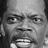

In [2]:
i = 10
img = Image.open(f'./dataset/train/train{i}.jpg')

display(img)

In [3]:
img_array = np.array(img)
img_array.shape

(48, 48)

In [5]:
img_array

array([[ 27,  28,  21, ...,  37,  47,  34],
       [ 27,  27,  22, ...,  36,  39,  38],
       [ 26,  24,  21, ...,  36,  30,  40],
       ...,
       [ 29,  31,  26, ..., 115, 136, 147],
       [ 28,  33,  26, ..., 149, 155, 164],
       [ 27,  35,  26, ..., 172, 172, 177]], dtype=uint8)

In [6]:
rgb_img = img.convert('RGB')
rgb_img_array = np.array(rgb_img)
rgb_img_array.shape

(48, 48, 3)

In [8]:
rgb_img_array[:,:,0]

array([[ 27,  28,  21, ...,  37,  47,  34],
       [ 27,  27,  22, ...,  36,  39,  38],
       [ 26,  24,  21, ...,  36,  30,  40],
       ...,
       [ 29,  31,  26, ..., 115, 136, 147],
       [ 28,  33,  26, ..., 149, 155, 164],
       [ 27,  35,  26, ..., 172, 172, 177]], dtype=uint8)

In [9]:
rgb_img_array[:,:,1]

array([[ 27,  28,  21, ...,  37,  47,  34],
       [ 27,  27,  22, ...,  36,  39,  38],
       [ 26,  24,  21, ...,  36,  30,  40],
       ...,
       [ 29,  31,  26, ..., 115, 136, 147],
       [ 28,  33,  26, ..., 149, 155, 164],
       [ 27,  35,  26, ..., 172, 172, 177]], dtype=uint8)

In [16]:
rgb_img_array[:,:,2]

array([[ 27,  28,  21, ...,  37,  47,  34],
       [ 27,  27,  22, ...,  36,  39,  38],
       [ 26,  24,  21, ...,  36,  30,  40],
       ...,
       [ 29,  31,  26, ..., 115, 136, 147],
       [ 28,  33,  26, ..., 149, 155, 164],
       [ 27,  35,  26, ..., 172, 172, 177]], dtype=uint8)

In [11]:
rgb_img_array

array([[[ 27,  27,  27],
        [ 28,  28,  28],
        [ 21,  21,  21],
        ...,
        [ 37,  37,  37],
        [ 47,  47,  47],
        [ 34,  34,  34]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 22,  22,  22],
        ...,
        [ 36,  36,  36],
        [ 39,  39,  39],
        [ 38,  38,  38]],

       [[ 26,  26,  26],
        [ 24,  24,  24],
        [ 21,  21,  21],
        ...,
        [ 36,  36,  36],
        [ 30,  30,  30],
        [ 40,  40,  40]],

       ...,

       [[ 29,  29,  29],
        [ 31,  31,  31],
        [ 26,  26,  26],
        ...,
        [115, 115, 115],
        [136, 136, 136],
        [147, 147, 147]],

       [[ 28,  28,  28],
        [ 33,  33,  33],
        [ 26,  26,  26],
        ...,
        [149, 149, 149],
        [155, 155, 155],
        [164, 164, 164]],

       [[ 27,  27,  27],
        [ 35,  35,  35],
        [ 26,  26,  26],
        ...,
        [172, 172, 172],
        [172, 172, 172],
        [177, 177, 177]]